# Data Exploration for the Skillcraft Dataset

In [148]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import torch

from torchvision.datasets.utils import download_url, extract_archive

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

%matplotlib inline

In [149]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [150]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv"

raw_folder = "/home/flo/ssdgm/notebooks/datasets/UCI/Skillcraft/raw"
processed_folder = "/home/flo/ssdgm/notebooks/datasets/UCI/Skillcraft/processed"
filename = os.path.basename(url)

os.makedirs(raw_folder, exist_ok=True)
os.makedirs(processed_folder, exist_ok=True)

download_url(url=url, root=raw_folder, filename=filename)

Using downloaded and verified file: /home/flo/ssdgm/notebooks/datasets/UCI/Skillcraft/raw/SkillCraft1_Dataset.csv


In [151]:
df = pd.read_csv(os.path.join(raw_folder, filename))
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [152]:
print(*[col for col in df.columns], sep="\n")

GameID
LeagueIndex
Age
HoursPerWeek
TotalHours
APM
SelectByHotkeys
AssignToHotkeys
UniqueHotkeys
MinimapAttacks
MinimapRightClicks
NumberOfPACs
GapBetweenPACs
ActionLatency
ActionsInPAC
TotalMapExplored
WorkersMade
UniqueUnitsMade
ComplexUnitsMade
ComplexAbilitiesUsed


In [153]:
print(f"The raw dataset has {len(df)} rows.")

The raw dataset has 3395 rows.


Drop any potential duplicated rows.

In [154]:
df.drop_duplicates(inplace=True)
len(df)

3395

In [155]:
df["GameID"]

0          52
1          55
2          56
3          57
4          58
        ...  
3390    10089
3391    10090
3392    10092
3393    10094
3394    10095
Name: GameID, Length: 3395, dtype: int64

Drop the "GameID" column, as it is an unique id for each game and doesn't hold
any information.

In [156]:
df.drop(labels=["GameID"], axis=1, inplace=True)

Check if there are any NA values in the columns.

In [157]:
df.isna().any(axis=0)

LeagueIndex             False
Age                     False
HoursPerWeek            False
TotalHours              False
APM                     False
SelectByHotkeys         False
AssignToHotkeys         False
UniqueHotkeys           False
MinimapAttacks          False
MinimapRightClicks      False
NumberOfPACs            False
GapBetweenPACs          False
ActionLatency           False
ActionsInPAC            False
TotalMapExplored        False
WorkersMade             False
UniqueUnitsMade         False
ComplexUnitsMade        False
ComplexAbilitiesUsed    False
dtype: bool

Check the datatypes of the columns. We see that "Age", "HoursPerWeek", and 
"TotalHours" are of Pandas dtype `object`. This means it can hold **any Python object**,
including strings. 

In [158]:
df.dtypes

LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

Look at the unique values in each column. Here, we see that the three
above-mentioned columns consist of numbers that were stored as strings. Also
these columns contain the '?' character, which is not valid.

In [159]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}\n\n")

LeagueIndex: [5 4 3 2 1 7 6 8]


Age: ['27' '23' '30' '19' '32' '21' '17' '20' '18' '16' '26' '38' '28' '25'
 '22' '29' '24' '35' '31' '33' '37' '40' '34' '43' '41' '36' '44' '39' '?']


HoursPerWeek: ['10' '20' '6' '8' '42' '14' '24' '16' '4' '12' '30' '28' '70' '2' '56'
 '36' '40' '18' '96' '50' '168' '48' '84' '0' '72' '112' '90' '32' '98'
 '140' '?' '80' '60']


TotalHours: ['3000' '5000' '200' '400' '500' '70' '240' '10000' '2708' '800' '6000'
 '190' '350' '1000' '1500' '2000' '120' '1100' '2520' '700' '160' '150'
 '250' '730' '230' '300' '100' '270' '1200' '30' '600' '540' '280' '1600'
 '50' '140' '900' '550' '625' '1300' '450' '750' '612' '180' '770' '720'
 '415' '1800' '2200' '480' '430' '639' '360' '1250' '365' '650' '233'
 '416' '1825' '780' '1260' '315' '10' '312' '110' '1700' '92' '2500'
 '1400' '220' '999' '303' '96' '184' '4000' '420' '60' '2400' '2160' '80'
 '25' '624' '176' '?' '35' '1163' '333' '75' '7' '40' '325' '90' '175'
 '88' '850' '26' '1650' '465' '235' '1350' '

Remove the rows from the dataset that contain '?'.

In [160]:
index_names = df[(df["Age"] == '?') | (df["HoursPerWeek"] == '?') | (df["TotalHours"] == '?')].index
index_names

Int64Index([ 358, 1841, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348,
            3349, 3350, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359,
            3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3369, 3370,
            3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381,
            3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392,
            3393, 3394],
           dtype='int64')

In [161]:
df.drop(index_names, inplace=True)

Convert the columns with dtype object to numeric.

In [162]:
df = df.astype(float)
df.dtypes


LeagueIndex             float64
Age                     float64
HoursPerWeek            float64
TotalHours              float64
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys           float64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored        float64
WorkersMade             float64
UniqueUnitsMade         float64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

Filter out rows with unreasonably low or high values for "HoursPerWeek".

In [163]:
df.drop(df[df['HoursPerWeek'].isin([0, 168])].index, axis=0, inplace=True)
len(df)

3336

Here we see that "TotalHours" can be smaller than "HoursPerWeek". So we drop rows
that exhibit this property.

In [164]:
df[df['TotalHours'] == 3]


,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
976,3.0,16.0,28.0,3.0,69.5748,0.001016,0.000371,3.0,0.0,0.000239,0.003623,57.3775,69.4389,3.3234,18.0,0.00055,7.0,0.0,0.00049


In [165]:
idx = df[df['HoursPerWeek'] > df['TotalHours']].index
df.drop(idx, axis=0, inplace=True)
df

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5.0,27.0,10.0,3000.0,143.7180,0.003515,0.000220,7.0,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28.0,0.001397,6.0,0.0,0.000000
1,5.0,23.0,10.0,5000.0,129.2322,0.003304,0.000259,4.0,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22.0,0.001193,5.0,0.0,0.000208
2,4.0,30.0,10.0,200.0,69.9612,0.001101,0.000336,4.0,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22.0,0.000745,6.0,0.0,0.000189
3,3.0,19.0,20.0,400.0,107.6016,0.001034,0.000213,1.0,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19.0,0.000426,7.0,0.0,0.000384
4,3.0,32.0,10.0,500.0,122.8908,0.001136,0.000327,2.0,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15.0,0.001174,4.0,0.0,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,4.0,20.0,8.0,400.0,158.1390,0.013829,0.000504,7.0,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30.0,0.001035,7.0,0.0,0.000287
3336,5.0,16.0,56.0,1500.0,186.1320,0.006951,0.000360,6.0,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38.0,0.001343,7.0,0.0,0.000388
3337,4.0,21.0,8.0,100.0,121.6992,0.002956,0.000241,8.0,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23.0,0.002014,7.0,0.0,0.000000
3338,3.0,20.0,28.0,400.0,134.2848,0.005424,0.000182,5.0,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18.0,0.000934,5.0,0.0,0.000000


Split dataset in data and target part. Also convert the pandas Dataframe to a NumPy array.

In [214]:
indices_to_drop = df[df["TotalHours"] > 25000.0].index
df.drop(indices_to_drop, axis=0, inplace=True)

array([[<AxesSubplot:xlabel='LeagueIndex', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='Age', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='HoursPerWeek', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='TotalHours', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='APM', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='SelectByHotkeys', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='AssignToHotkeys', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='UniqueHotkeys', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='MinimapAttacks', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='MinimapRightClicks', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='NumberOfPACs', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='GapBetweenPACs', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='ActionLatency', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='ActionsInPAC', ylabel='LeagueIndex'>,
        <AxesSubplot:xlabel='TotalMapExplored', ylabel='LeagueInd

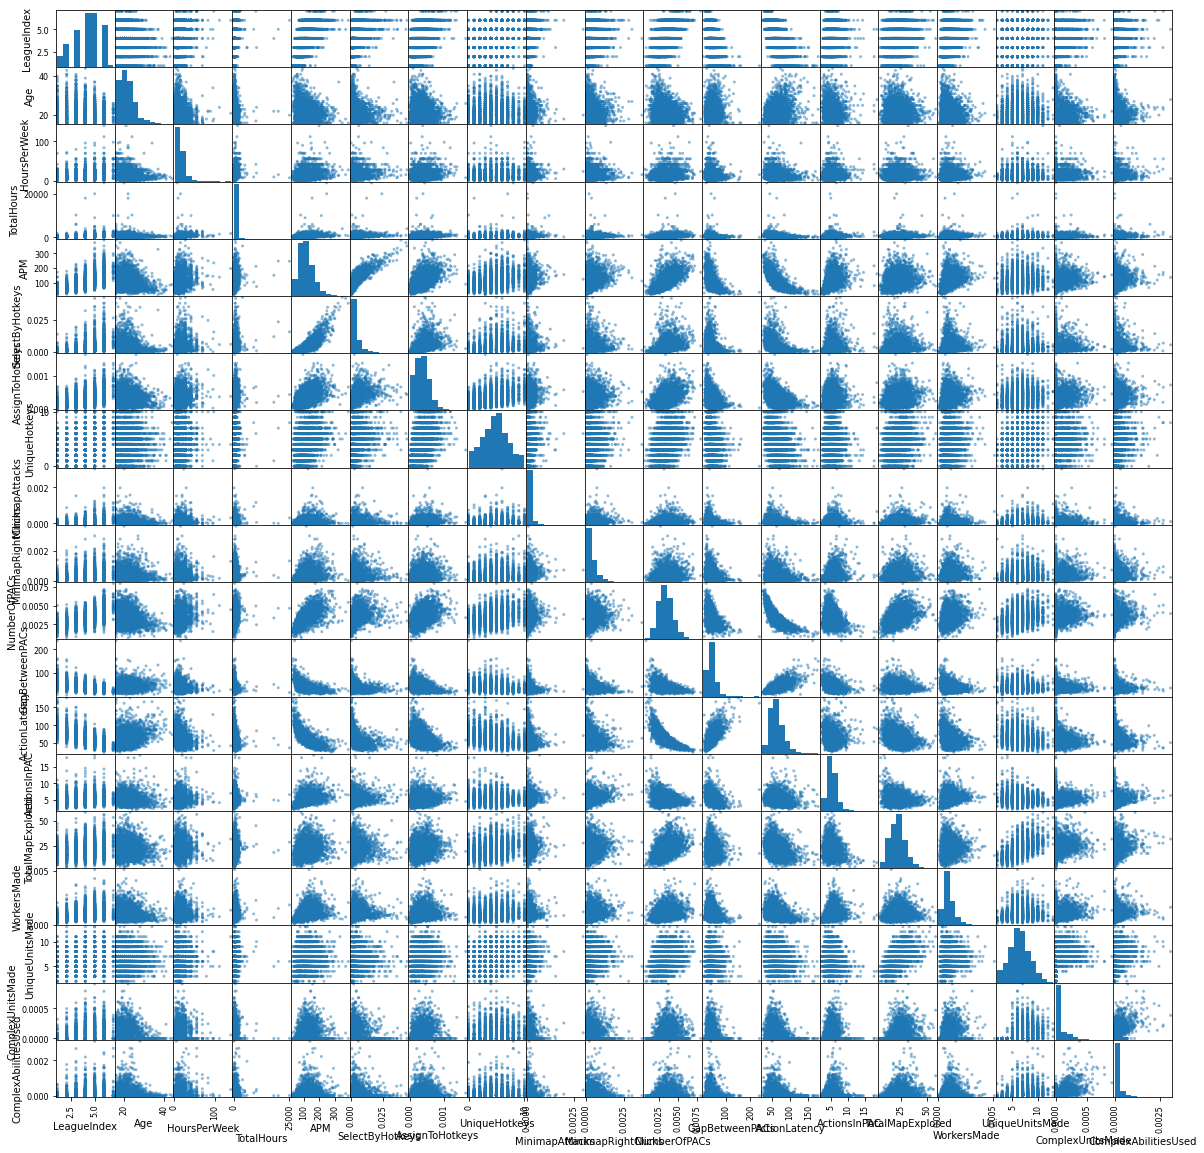

In [215]:
scatter_matrix(df, figsize=(20, 20))

In [216]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

train_set = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)

y_train_mean = np.mean(y_train[:100])
y_train_std  = np.std(y_train[:100])


X_train_sc = (X_train - X_train_mean) / X_train_std
y_train_sc = (y_train - y_train_mean) / y_train_std

X_test_sc = (X_test - X_train_mean) / X_train_std
y_test_sc = (y_test - y_train_mean) / y_train_std





array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>,
        <AxesSubplot:xlabel='6', ylabel='0'>,
        <AxesSubplot:xlabel='7', ylabel='0'>,
        <AxesSubplot:xlabel='8', ylabel='0'>,
        <AxesSubplot:xlabel='9', ylabel='0'>,
        <AxesSubplot:xlabel='10', ylabel='0'>,
        <AxesSubplot:xlabel='11', ylabel='0'>,
        <AxesSubplot:xlabel='12', ylabel='0'>,
        <AxesSubplot:xlabel='13', ylabel='0'>,
        <AxesSubplot:xlabel='14', ylabel='0'>,
        <AxesSubplot:xlabel='15', ylabel='0'>,
        <AxesSubplot:xlabel='16', ylabel='0'>,
        <AxesSubplot:xlabel='17', ylabel='0'>,
        <AxesSubplot:xlabel='18', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xla

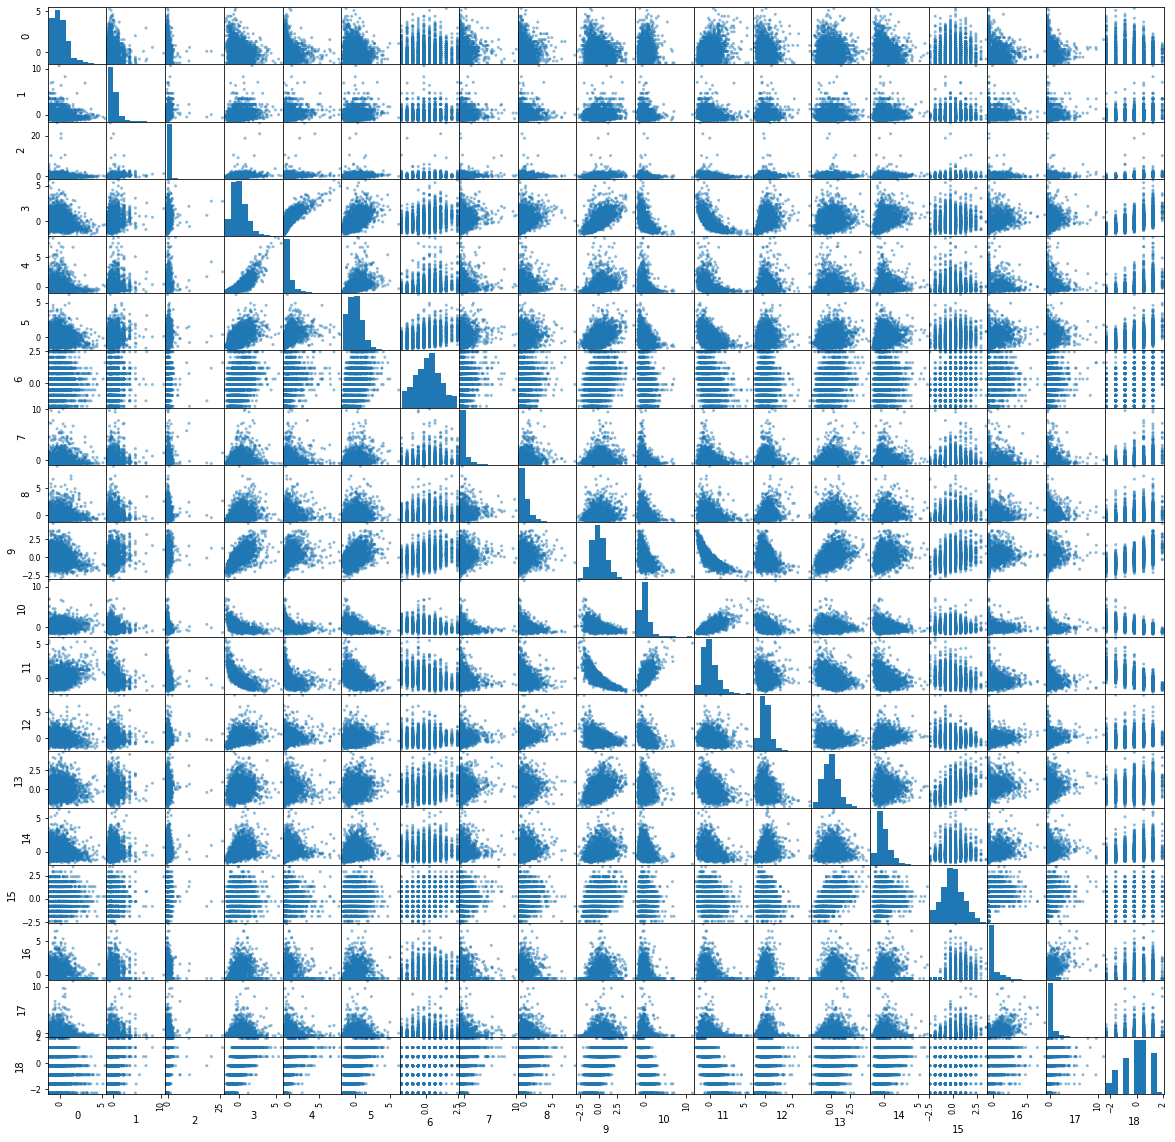

In [217]:
scatter_matrix(pd.DataFrame(np.concatenate((X_train_sc, y_train_sc.reshape(-1, 1)), axis=1)), figsize=(20, 20))

In [218]:
np.max(X, axis=0)

array([4.4000000e+01, 1.4000000e+02, 2.5000000e+04, 3.8983140e+02,
       4.3088364e-02, 1.6482988e-03, 1.0000000e+01, 3.0193465e-03,
       3.6876680e-03, 7.9706424e-03, 2.3714290e+02, 1.7637210e+02,
       1.8558100e+01, 5.8000000e+01, 5.1493000e-03, 1.3000000e+01,
       9.0227440e-04, 3.0837000e-03])

In [219]:
#X_train_sc = train_set_sc[:100, :-1]
#y_train_sc = train_set_sc[:100, -1]

#X_test_sc = test_set_sc[:, :-1]
#y_test_sc = test_set_sc[:, -1]

reg = MLPRegressor(
    hidden_layer_sizes=[1024, 1024, 1024]
)
#reg = RandomForestRegressor(
#    n_estimators=500
#)

#reg = SVR(
#    
#)


reg.fit(X_train_sc[:90], y_train_sc[:90])

y_pred = reg.predict(X_test_sc)
print(mean_squared_error(y_test_sc, y_pred))
print(r2_score(y_test_sc, y_pred))

0.6821608857908071
0.3038003995667997


In [220]:
np.max(X_train_sc)

26.325884579652314

In [221]:
X_test_sc

array([[ 0.08871816,  0.70458257,  0.62590353, ...,  1.85539115,
         1.48463651,  1.46075317],
       [ 0.80365586, -1.00314647, -0.60769556, ..., -0.82044114,
        -0.53849243,  0.09142902],
       [-0.1495944 ,  1.72922   ,  0.57179831, ...,  1.85539115,
         1.80504662,  4.38471922],
       ...,
       [-1.34115722,  2.75385743,  0.89642965, ...,  0.24989178,
        -0.53849243,  0.59948094],
       [ 0.56534329, -0.49082776,  0.03074608, ..., -0.28527468,
         0.47994782, -0.14781115],
       [ 0.56534329, -0.32005485,  0.13895652, ..., -0.82044114,
        -0.53849243, -0.53308004]])

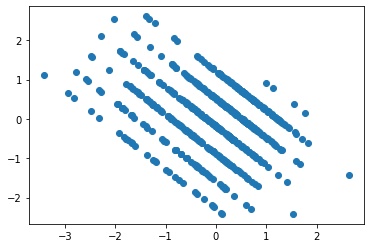

In [222]:
residuals = y_test_sc - y_pred

plt.plot(y_pred, residuals, 'o')

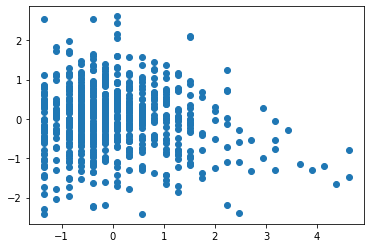

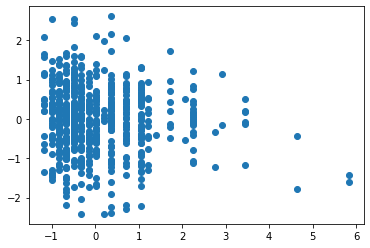

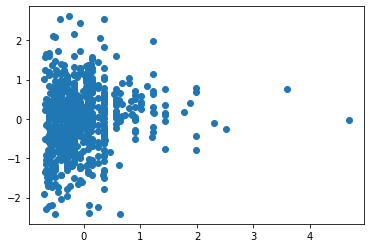

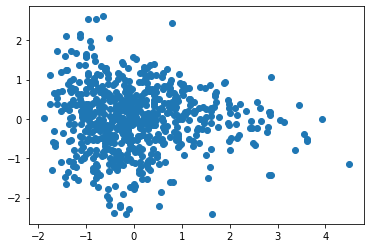

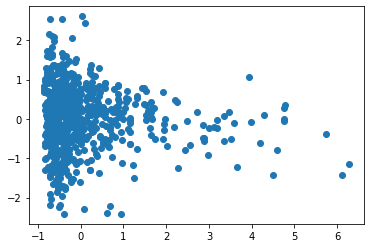

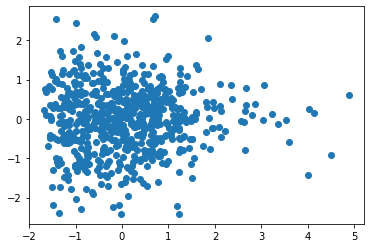

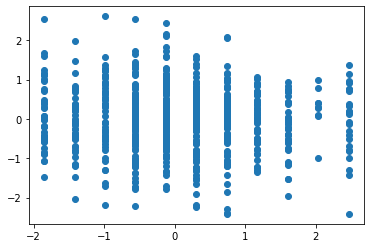

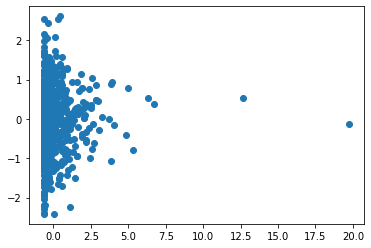

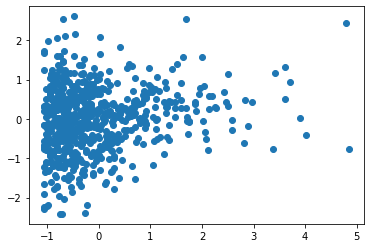

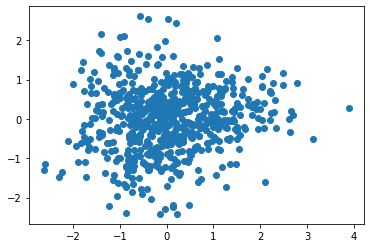

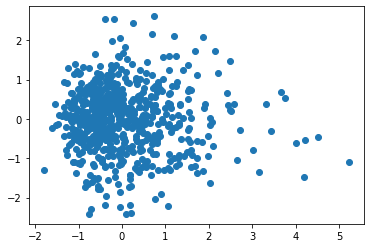

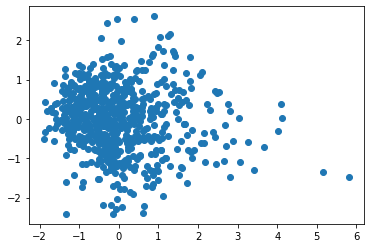

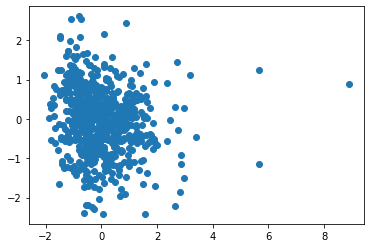

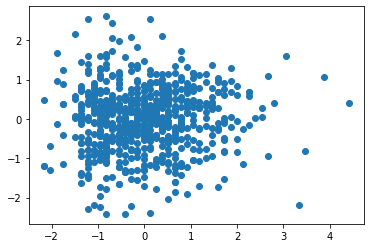

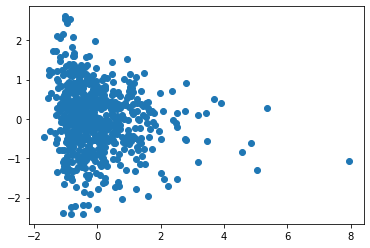

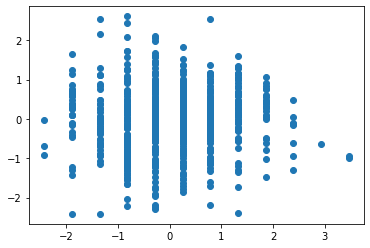

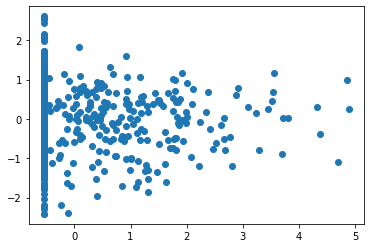

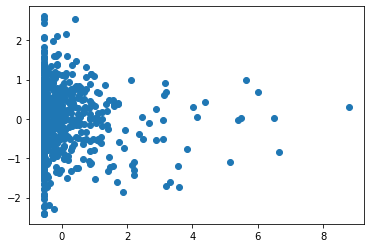

In [223]:
for i in range(18):
    plt.figure()
    plt.plot(X_test_sc[:, i], residuals, 'o')

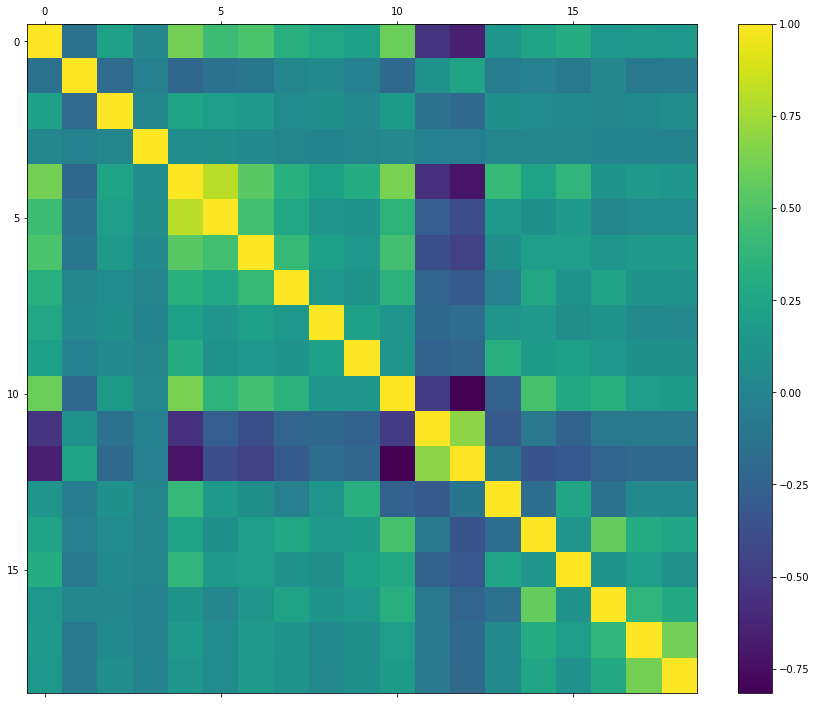

In [181]:
fig = plt.figure(figsize=(15, 12))
plt.matshow(df.corr(), fignum=fig.number)
plt.colorbar()
plt.show()

In [19]:
data = df.loc[:, df.columns != "APM"].to_numpy()
target = df["APM"].to_numpy()


In [20]:
data_file = "data.pt"
with open(os.path.join(processed_folder, data_file), 'wb') as f:
    torch.save(data, f)

In [21]:
target_file = "target.pt"
with open(os.path.join(processed_folder, target_file), 'wb') as f:
    torch.save(target, f)

In [23]:
torch.load(os.path.join(processed_folder, data_file))

array([[5.0000e+00, 2.7000e+01, 1.0000e+01, ..., 6.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.0000e+00, 2.3000e+01, 1.0000e+01, ..., 5.0000e+00, 0.0000e+00,
        2.0757e-04],
       [4.0000e+00, 3.0000e+01, 1.0000e+01, ..., 6.0000e+00, 0.0000e+00,
        1.8876e-04],
       ...,
       [4.0000e+00, 2.1000e+01, 8.0000e+00, ..., 7.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.0000e+00, 2.0000e+01, 2.8000e+01, ..., 5.0000e+00, 0.0000e+00,
        0.0000e+00],
       [4.0000e+00, 2.2000e+01, 6.0000e+00, ..., 8.0000e+00, 0.0000e+00,
        5.3891e-05]])

Load the data from the SSDKL paper.

In [38]:
ssdkl_folder = "/home/flo/ssdgm/notebooks/datasets/SSDKL/skillcraft"
X = np.load(os.path.join(ssdkl_folder, "X.npy"))
y = np.load(os.path.join(ssdkl_folder, "y.npy"))

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>,
        <AxesSubplot:xlabel='6', ylabel='0'>,
        <AxesSubplot:xlabel='7', ylabel='0'>,
        <AxesSubplot:xlabel='8', ylabel='0'>,
        <AxesSubplot:xlabel='9', ylabel='0'>,
        <AxesSubplot:xlabel='10', ylabel='0'>,
        <AxesSubplot:xlabel='11', ylabel='0'>,
        <AxesSubplot:xlabel='12', ylabel='0'>,
        <AxesSubplot:xlabel='13', ylabel='0'>,
        <AxesSubplot:xlabel='14', ylabel='0'>,
        <AxesSubplot:xlabel='15', ylabel='0'>,
        <AxesSubplot:xlabel='16', ylabel='0'>,
        <AxesSubplot:xlabel='17', ylabel='0'>,
        <AxesSubplot:xlabel='18', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xla

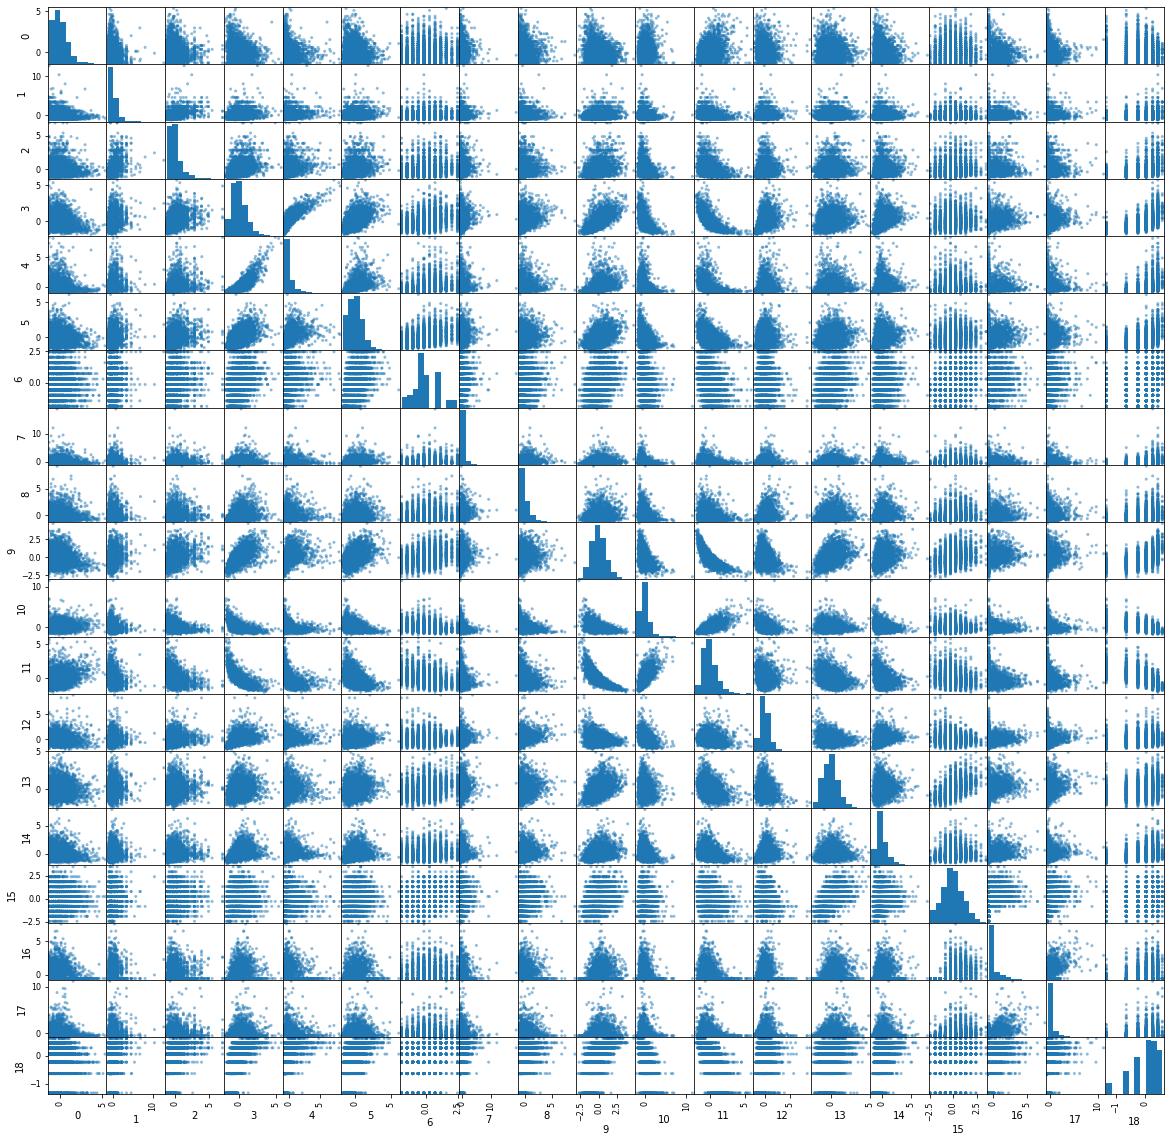

In [45]:
scatter_matrix(pd.DataFrame(np.concatenate((X, y.reshape(-1, 1)), axis=1)), figsize=(20, 20))

In [26]:
np.unique(y)

array([-1.33150339, -0.63835621, -0.2328911 ,  0.05479097,  0.27793452,
        0.46025608,  0.61440676])

In [35]:
X.shape, y.shape

((5875, 20), (5875,))

In [36]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [37]:
values = len(pd.unique(df["LeagueIndex"]))
print(f"There are {values} different values in the 'LeagueIndex' column")

There are 7 different values in the 'LeagueIndex' column


In [27]:
print(f"There are {len(np.unique(y))} different values in the SSDKL target.")

There are 7 different values in the SSDKL target.


In [39]:
np.unique(scaled_data[:, 0])

array([-2.16226904, -1.47020158, -0.77813412, -0.08606666,  0.60600079,
        1.29806825,  1.99013571])

In [40]:
scaled_data[:10, 0]

array([ 0.60600079,  0.60600079, -0.08606666, -0.77813412, -0.77813412,
       -1.47020158, -2.16226904,  1.99013571, -0.08606666, -0.08606666])

In [41]:
df["LeagueIndex"][:10]

0    5.0
1    5.0
2    4.0
3    3.0
4    3.0
5    2.0
6    1.0
7    7.0
8    4.0
9    4.0
Name: LeagueIndex, dtype: float64